## Imports

In [2]:
# for exporting plotly to gif,
# !pip install "gif[plotly]" gif

In [1]:
import os
# start the notebook in the root of the git repo, so that we can import our stuff
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import scipy as sp
from src.simulation.sim import *
from src.analyse.analyse import *
# import graph_tool as gt
import pandas as pd
import powerlaw as pl
import plotly.io as pio
from scipy.optimize import curve_fit
pio.renderers.default = 'notebook_connected'
import numpy as np


/opt/homebrew/Cellar/graph-tool/2.44_1/lib/python3.9/site-packages/graph_tool/draw/cairo_draw.py:1501: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from partially initialized module 'gi' (most likely due to a circular import) (/opt/homebrew/opt/pygobject3/lib/python3.9/site-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


## Pass in lastest results/Certain files

In [15]:
# res = analyse_last_results()
# res = analyse_results("output/res-2022_08_16-11_13_47.json")  # 10,000 steps
# res = analyse_results("output/res-2022_08_23-10_57_28.json")  # 2 sims with same coin list
# res = analyse_results("output/res-2022_08_23-11_07_29.json")  # 2 sims with same prior
res = analyse_results("output/res-2022_08_23-14_24_20.json")  # 10^6 steps took 2700s

# res = analyse_results("output/res-2022_09_06-15_03_19.json")  #4 sim with same coin list
# res = analyse_results("output/res-2022_09_06-16_03_12.json")  #4 sim with same prior
# res_p = analyse_results("output/res-2022_09_07-12_58_32.json")  #4 sim with same prior
# res = analyse_results("output/res-2022_09_07-13_01_01.json")
# sim = res[0]

## Plotly results

In [ ]:
# Plotly animation 
# If there are too many time step it just refuses to plot
# res[0].plotly_distr()
res[0].plotly_distr(steps=range(1700, 2500, 1))


KeyboardInterrupt: 

In [ ]:
res[0].plotly_distr_gif()

## General Plot

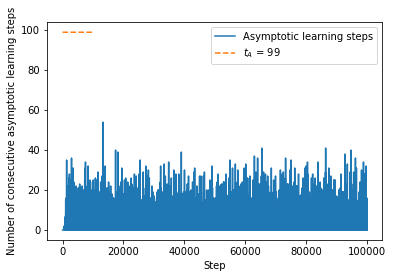

In [ ]:
from cProfile import label


res[0].plot_asymptotic_learning_steps()
# plt.xlim(7900,8000)
# plt.ylim(0,99)
plt.plot(10000*[99], linestyle='dashed', label = '$t_A$ = 99')
plt.legend()

In [ ]:
np.nonzero(np.array(res[0].results.asymptotic)== 100)

(array([5346, 6779]),)

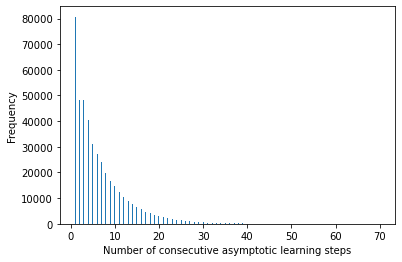

In [156]:
res[0].plot_asymptotic_learning_steps_hist(include_zero=False, bins ='auto', log= False)
# plt.xscale('log')


In [35]:
res_pd = pd.Series(res[0].dwell_time())
res_pd.describe()

count    80698.000000
mean         5.391460
std          5.983289
min          1.000000
25%          1.000000
50%          4.000000
75%          7.000000
max         70.000000
dtype: float64

{'bodies': [<matplotlib.collections.PolyCollection at 0x2a1f4be50>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a1f4bdf0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a1e6c400>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a1e6c7c0>}

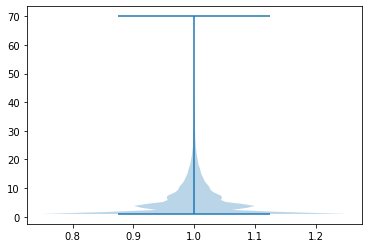

In [94]:
plt.violinplot(res[0].dwell_time())

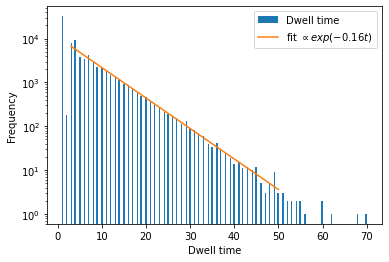

In [73]:
res[0].plot_dwell_time(log = True)

x = np.linspace(3, 50, 100)
y = (4.03256 - 0.0694871*x)
plt.plot(x, 10**y, label = 'fit $\\propto exp(-0.16t)$')
plt.legend()
# x,y = np.unique(res[0].dwell_time(), return_counts=True)
# logy = np.log10(y)
# c,m = np.polyfit(x,logy,1)
# fittedy = m* 10**x+ c
# # plt.yscale('log')
# plt.plot(x, fittedy,label = 'fitted line')

/var/folders/6t/gcbt13x90lz1yzhpf_929z_00000gn/T/ipykernel_37262/231102260.py:2: RuntimeWarning:

overflow encountered in exp



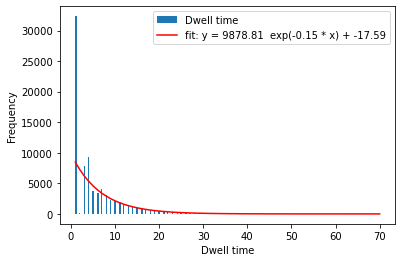

/var/folders/6t/gcbt13x90lz1yzhpf_929z_00000gn/T/ipykernel_37262/231102260.py:2: RuntimeWarning:

overflow encountered in exp



0.9991251628922836

In [75]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x,y = np.unique(np.sort(res[0].dwell_time()), return_counts=True)

popt, pcov = curve_fit(func, x[5:40], y[5:40])

plt.figure()
res[0].plot_dwell_time(log = False)
plt.plot(x, func(x, *popt), 'r-', label="fit: y = {:.2f}  exp(-{:.2f} * x) + {:.2f}".format(*popt))
# plt.yscale('log')
# plt.xlim(40,70)
plt.legend()
plt.show()

popt, pcov = curve_fit(func, x[5:40], y[5:40])
residuals = y[5:40]- func(x[5:40], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared


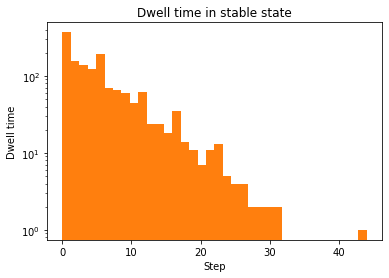

In [27]:
res[0].plot_dwell_time(stable_iters = 10,log = True)

In [22]:
np.array(res[0].belief_at_asymptotic(iter = 10))


array([0.5969862 , 0.59791783, 0.59825447, ..., 0.59660676, 0.59834567,
       0.59825613])

In [31]:
res[0].check_belief_at_asymptotic(iter = 10)

1.0

Text(0, 0.5, '$x_i(t,\\theta)$')

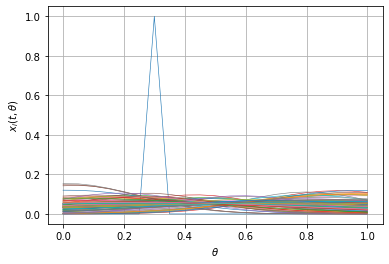

In [53]:
res[0].plot_initial_distr()

plt.grid()
plt.ylabel("$x_i(t,\\theta)$")

(0.0, 0.2)

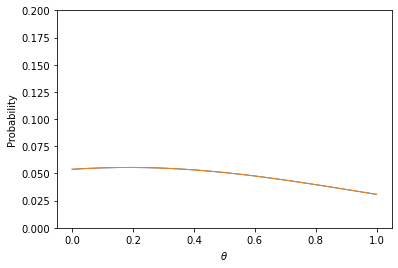

In [87]:
res[0].plot_distr(0,title=None,simid=-1)
res[1].plot_distr(0,title=None,simid=-1)
plt.ylim(0,0.2)

In [15]:
sim.results.mean_list[0]
# sim.results.std_list[0]

array([0.3       , 0.57138829, 0.43873411])

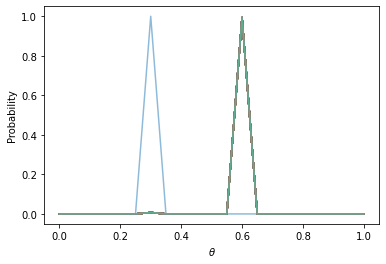

In [77]:
res[0].plot_final_distr()


Text(0.5, 1.0, 'Distribution at time step 2400 with $\\theta_p=0.3$ and $\\theta_0=0$')

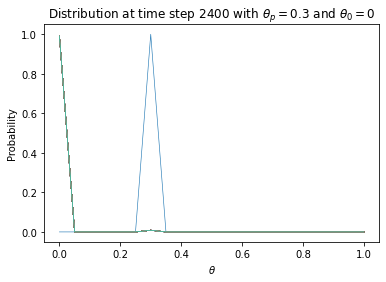

In [104]:
res[0].plot_distr(2400)

plt.title("Distribution at time step 2400 with $\\theta_p=0.3$ and $\\theta_0=0$")

(0.0, 15.0)

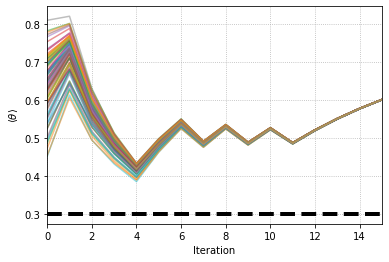

In [27]:
res[0].plot_all_mean()
plt.xlim(0,15)

(0.3, 0.7)

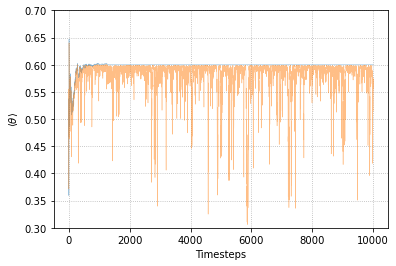

In [22]:
res[0].plot_non_partisan_mean()
res_p[0].plot_non_partisan_mean()
# res[1].plot_non_partisan_mean()
plt.grid(linestyle='dotted')
# plt.xlim(20,3000)
plt.ylim(0.3, 0.7)
# plt.xticks(range(0,15))

# plt.savefig("mean_converge.svg", format = 'svg', dpi=300)

Text(0, 0.5, '$\\langle\\theta\\rangle_A - \\langle\\theta\\rangle_B$')

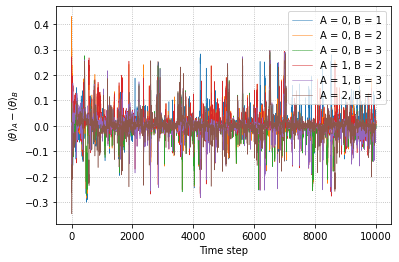

In [45]:

for i in range(4): 
    for j in range(i+1,4):
        diff = res[i].results.mean_list[:, -1] - res[j].results.mean_list[:, -1]
        plt.plot(diff, label = f"A = {i}, B = {j}", linewidth = 0.5)

plt.grid(linestyle='dotted')
plt.legend()
# plt.xlim(0,10)
# plt.ylim(-0.005,0.01)
plt.xlabel("Time step")
plt.ylabel("$\\langle\\theta\\rangle_A - \\langle\\theta\\rangle_B$")


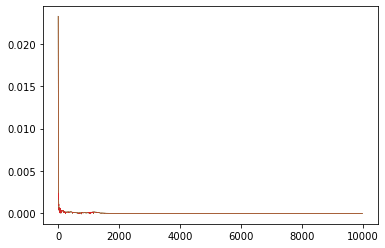

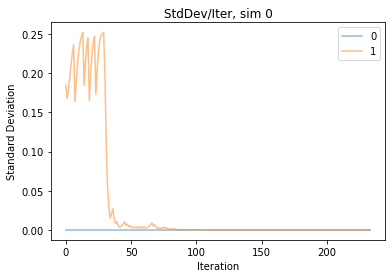

In [21]:
res[0].plot_std()

In [62]:
print(res[0].results.coins[400:])

[]


## Fraction of partisans and fraction achieve asymtotic learning 
<!-- This is for a network of 100 and partisans from 1 to 99 -->
<!-- This is for a MAX_ITER = 1000 -->

Text(0, 0.5, 'Fraction of simulations achieving asymptotic learning')

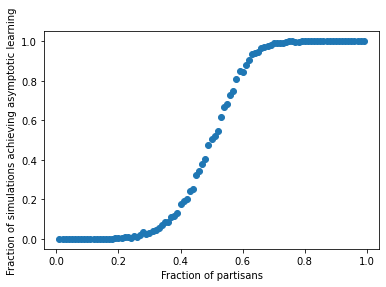

In [15]:
asy = [(0.01, 0.0), (0.02, 0.0), (0.03, 0.0), (0.04, 0.0), (0.05, 0.0), (0.06, 0.0), (0.07, 0.0), (0.08, 0.001), (0.09, 0.0), (0.1, 0.001), (0.11, 0.001), (0.12, 0.001), (0.13, 0.0), (0.14, 0.001), (0.15, 0.0), (0.16, 0.002), (0.17, 0.002), (0.18, 0.002), (0.19, 0.003), (0.2, 0.005), (0.21, 0.004), (0.22, 0.008), (0.23, 0.009), (0.24, 0.007), (0.25, 0.015), (0.26, 0.012), (0.27, 0.021), (0.28, 0.033), (0.29, 0.026), (0.3, 0.029), (0.31, 0.042), (0.32, 0.045), (0.33, 0.055), (0.34, 0.07), (0.35, 0.084), (0.36, 0.085), (0.37, 0.111), (0.38, 0.118), (0.39, 0.13), (0.4, 0.175), (0.41, 0.194), (0.42, 0.203), (0.43, 0.24), (0.44, 0.254), (0.45, 0.325), (0.46, 0.345), (0.47, 0.38), (0.48, 0.405), (0.49, 0.474), (0.5, 0.505), (0.51, 0.519), (0.52, 0.544), (0.53, 0.618), (0.54, 0.665), (0.55, 0.684), (0.56, 0.727), (0.57, 0.749), (0.58, 0.811), (0.59, 0.847), (0.6, 0.844), (0.61, 0.878), (0.62, 0.904), (0.63, 0.935), (0.64, 0.938), (0.65, 0.945), (0.66, 0.966), (0.67, 0.97), (0.68, 0.978), (0.69, 0.98), (0.7, 0.99), (0.71, 0.991), (0.72, 0.992), (0.73, 0.993), (0.74, 0.994), (0.75, 0.999), (0.76, 0.999), (0.77, 0.997), (0.78, 0.998), (0.79, 0.999), (0.8, 1.0), (0.81, 1.0), (0.82, 0.999), (0.83, 1.0), (0.84, 1.0), (0.85, 1.0), (0.86, 1.0), (0.87, 1.0), (0.88, 1.0), (0.89, 1.0), (0.9, 1.0), (0.91, 1.0), (0.92, 1.0), (0.93, 1.0), (0.94, 1.0), (0.95, 1.0), (0.96, 1.0), (0.97, 1.0), (0.98, 1.0), (0.99, 1.0)]
x, y = zip(*asy)
plt.scatter(x, y)
plt.xlabel("Fraction of partisans")
plt.ylabel("Fraction of simulations achieving asymptotic learning")
# it only took 2 hours to run 100k simulations!

Text(0, 0.5, 'Mean number of agents achieving asymptotic learning at simulation end')

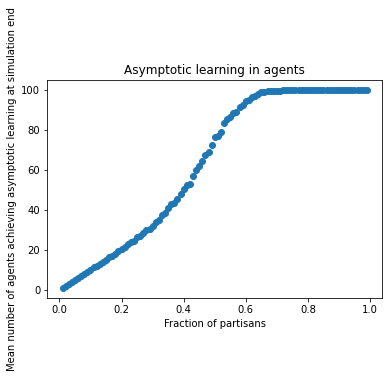

In [6]:
# Without partisan
bigres = [(0.01, 1.0, [0.0, 1.0, 0.0]), (0.02, 2.0, [0.0, 1.0, 0.0]), (0.03, 3.0, [0.0, 1.0, 0.0]), (0.04, 4.0, [0.0, 1.0, 0.0]), (0.05, 5.0, [0.0, 1.0, 0.0]), (0.06, 6.0, [0.0, 1.0, 0.0]), (0.07, 7.0, [0.0, 1.0, 0.0]), (0.08, 8.0, [0.0, 1.0, 0.0]), (0.09, 9.0, [0.0, 1.0, 0.0]), (0.1, 10.0, [0.0, 1.0, 0.0]), (0.11, 11.178, [0.0, 1.0, 0.0]), (0.12, 12.0, [0.0, 1.0, 0.0]), (0.13, 13.0, [0.0, 1.0, 0.0]), (0.14, 14.0, [0.0, 1.0, 0.0]), (0.15, 15.0, [0.0, 1.0, 0.0]), (0.16, 16.168, [0.0, 1.0, 0.0]), (0.17, 17.0, [0.0, 1.0, 0.0]), (0.18, 18.082, [0.0, 1.0, 0.0]), (0.19, 19.486, [0.0, 1.0, 0.0]), (0.2, 20.4, [0.0, 1.0, 0.0]), (0.21, 21.395, [0.0, 1.0, 0.0]), (0.22, 22.936, [0.0, 1.0, 0.0]), (0.23, 23.847, [0.0, 1.0, 0.0]), (0.24, 24.532, [0.0, 1.0, 0.0]), (0.25, 26.425, [0.0, 1.0, 0.0]), (0.26, 26.962, [0.0, 1.0, 0.0]), (0.27, 28.606, [0.0, 1.0, 0.0]), (0.28, 29.8, [0.0, 1.0, 0.0]), (0.29, 30.349, [0.0, 1.0, 0.0]), (0.3, 31.89, [0.0, 1.0, 0.0]), (0.31, 33.898, [0.0, 1.0, 0.0]), (0.32, 35.06, [0.0, 1.0, 0.0]), (0.33, 37.221, [0.0, 1.0, 0.0]), (0.34, 38.554, [0.0, 1.0, 0.0]), (0.35, 40.98, [0.0, 1.0, 0.0]), (0.36, 42.848, [0.0, 1.0, 0.0]), (0.37, 43.237, [0.0, 1.0, 0.0]), (0.38, 45.626, [0.0, 1.0, 0.0]), (0.39, 47.784, [0.0, 1.0, 0.0]), (0.4, 50.5, [0.0, 1.0, 0.0]), (0.41, 52.623, [0.0, 1.0, 0.0]), (0.42, 53.078, [0.0, 1.0, 0.0]), (0.43, 56.908, [0.0, 1.0, 0.0]), (0.44, 60.072, [0.0, 1.0, 0.0]), (0.45, 62.05, [0.0, 1.0, 0.0]), (0.46, 64.522, [0.0, 1.0, 0.0]), (0.47, 67.246, [0.0, 1.0, 0.0]), (0.48, 68.8, [0.0, 1.0, 0.0]), (0.49, 72.46, [0.0, 1.0, 0.0]), (0.5, 76.25, [0.0, 1.0, 0.0]), (0.51, 76.774, [0.0, 1.0, 0.0]), (0.52, 79.024, [0.0, 1.0, 0.0]), (0.53, 83.268, [0.0, 1.0, 0.0]), (0.54, 85.28, [0.0, 1.0, 0.0]), (0.55, 86.32, [0.0, 1.0, 0.0]), (0.56, 88.384, [0.0, 1.0, 0.0]), (0.57, 89.164, [0.0, 1.0, 0.0]), (0.58, 91.558, [0.0, 1.0, 0.0]), (0.59, 92.661, [0.0, 1.0, 0.0]), (0.6, 94.36, [0.0, 1.0, 0.0]), (0.61, 94.813, [0.0, 1.0, 0.0]), (0.62, 96.694, [0.0, 1.0, 0.0]), (0.63, 97.114, [0.0, 1.0, 0.0]), (0.64, 97.804, [0.0, 1.0, 0.0]), (0.65, 98.74, [0.0, 1.0, 0.0]), (0.66, 98.878, [0.0, 1.0, 0.0]), (0.67, 99.241, [0.0, 1.0, 0.0]), (0.68, 99.232, [0.0, 1.0, 0.0]), (0.69, 99.535, [0.0, 1.0, 0.0]), (0.7, 99.73, [0.0, 1.0, 0.0]), (0.71, 99.681, [0.0, 1.0, 0.0]), (0.72, 99.916, [0.0, 1.0, 0.0]), (0.73, 99.919, [0.0, 1.0, 0.0]), (0.74, 99.896, [0.0, 1.0, 0.0]), (0.75, 100.0, [0.0, 1.0, 0.0]), (0.76, 99.952, [0.0, 1.0, 0.0]), (0.77, 99.977, [0.0, 1.0, 0.0]), (0.78, 100.0, [0.0, 1.0, 0.0]), (0.79, 99.979, [0.0, 1.0, 0.0]), (0.8, 100.0, [0.0, 1.0, 0.0]), (0.81, 100.0, [0.0, 1.0, 0.0]), (0.82, 100.0, [0.0, 1.0, 0.0]), (0.83, 100.0, [0.0, 1.0, 0.0]), (0.84, 100.0, [0.0, 1.0, 0.0]), (0.85, 100.0, [0.0, 1.0, 0.0]), (0.86, 100.0, [0.0, 1.0, 0.0]), (0.87, 100.0, [0.0, 1.0, 0.0]), (0.88, 100.0, [0.0, 1.0, 0.0]), (0.89, 100.0, [0.0, 1.0, 0.0]), (0.9, 100.0, [0.0, 1.0, 0.0]), (0.91, 100.0, [0.0, 1.0, 0.0]), (0.92, 100.0, [0.0, 1.0, 0.0]), (0.93, 100.0, [0.0, 1.0, 0.0]), (0.94, 100.0, [0.0, 1.0, 0.0]), (0.95, 100.0, [0.0, 1.0, 0.0]), (0.96, 100.0, [0.0, 1.0, 0.0]), (0.97, 100.0, [0.0, 1.0, 0.0]), (0.98, 100.0, [0.0, 1.0, 0.0]), (0.99, 100.0, [0.0, 1.0, 0.0])]
asy = [(frac_partisans, num_agents_asymp) for (frac_partisans, num_agents_asymp, _) in bigres]
x, y = zip(*asy)
plt.scatter(x, y)
plt.title("Asymptotic learning in agents")
plt.xlabel("Fraction of partisans")
plt.ylabel("Mean number of agents achieving asymptotic learning at simulation end")

Text(0, 0.5, 'Fraction of simulations achieving asymptotic learning')

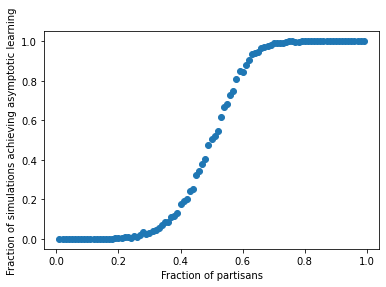

In [4]:
asy = [(0.01, 0.0), (0.02, 0.0), (0.03, 0.0), (0.04, 0.0), (0.05, 0.0), (0.06, 0.0), (0.07, 0.0), (0.08, 0.001), (0.09, 0.0), (0.1, 0.001), (0.11, 0.001), (0.12, 0.001), (0.13, 0.0), (0.14, 0.001), (0.15, 0.0), (0.16, 0.002), (0.17, 0.002), (0.18, 0.002), (0.19, 0.003), (0.2, 0.005), (0.21, 0.004), (0.22, 0.008), (0.23, 0.009), (0.24, 0.007), (0.25, 0.015), (0.26, 0.012), (0.27, 0.021), (0.28, 0.033), (0.29, 0.026), (0.3, 0.029), (0.31, 0.042), (0.32, 0.045), (0.33, 0.055), (0.34, 0.07), (0.35, 0.084), (0.36, 0.085), (0.37, 0.111), (0.38, 0.118), (0.39, 0.13), (0.4, 0.175), (0.41, 0.194), (0.42, 0.203), (0.43, 0.24), (0.44, 0.254), (0.45, 0.325), (0.46, 0.345), (0.47, 0.38), (0.48, 0.405), (0.49, 0.474), (0.5, 0.505), (0.51, 0.519), (0.52, 0.544), (0.53, 0.618), (0.54, 0.665), (0.55, 0.684), (0.56, 0.727), (0.57, 0.749), (0.58, 0.811), (0.59, 0.847), (0.6, 0.844), (0.61, 0.878), (0.62, 0.904), (0.63, 0.935), (0.64, 0.938), (0.65, 0.945), (0.66, 0.966), (0.67, 0.97), (0.68, 0.978), (0.69, 0.98), (0.7, 0.99), (0.71, 0.991), (0.72, 0.992), (0.73, 0.993), (0.74, 0.994), (0.75, 0.999), (0.76, 0.999), (0.77, 0.997), (0.78, 0.998), (0.79, 0.999), (0.8, 1.0), (0.81, 1.0), (0.82, 0.999), (0.83, 1.0), (0.84, 1.0), (0.85, 1.0), (0.86, 1.0), (0.87, 1.0), (0.88, 1.0), (0.89, 1.0), (0.9, 1.0), (0.91, 1.0), (0.92, 1.0), (0.93, 1.0), (0.94, 1.0), (0.95, 1.0), (0.96, 1.0), (0.97, 1.0), (0.98, 1.0), (0.99, 1.0)]
x, y = zip(*asy)
plt.scatter(x, y)
plt.title("Asymptotic learning in system")
plt.xlabel("Fraction of partisans")
plt.ylabel("Mean fraction of simulations achieving asymptotic learning")
# it only took 2 hours to run 100k simulations!

## Same prior/Same coin toss

In [122]:
# If "break_on_asymptotic_learning": True
# For each simulation, the time asymptotic learning was reached.
asymp_time = [(sim.results.steps) for i, sim in enumerate(res)]

# new_time = []
# for i in range(len(asymp_time)): 
#     # did converge in time
#     if asymp_time[i] != res[0].results.asymptotic:
#         new_time.append(asymp_time[i])
#  If any that didnt converge 
# len(new_time) - len(asymp_time)
# count = 0
# for i in range(len(asymp_time)): 
#     if asymp_time[i] != sim.params.max_steps: 
#         count +=1
# count


(0.0, 1500.0)

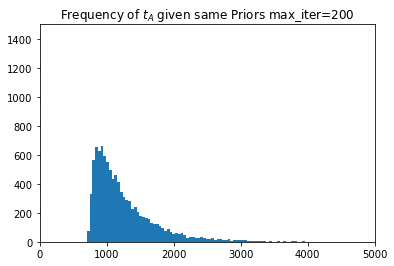

In [123]:
# plt.subplot(2, 1, 1)
# plt.xscale("log")
plt.hist(asymp_time,bins = 100)
plt.title("Frequency of $t_A$ given same Priors max_iter=200")
plt.xlim(0,5000)
plt.ylim(0,1500)
# plt.subplot(2, 1, 2)
# plt.scatter(new_time, range(len(new_time)), s=1)

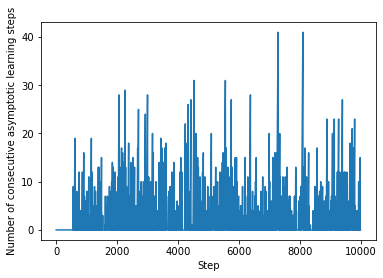

In [10]:
pd.DataFrame(res[0].results.asymptotic).describe()
res[0].plot_asymptotic_learning_steps()


## Powerlaw Fit

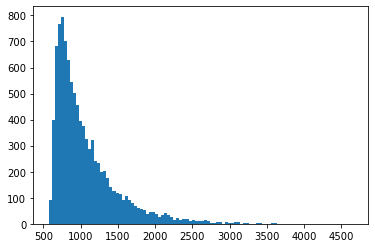

In [46]:
bin_heights, bin_borders, _ = plt.hist(new_time, density=False, bins=100)  # density=False would make counts
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
ydata, xdata = bin_heights, bin_centers

# plt.ylim([0, 300])
# plt.yscale('log')
# plt.xscale('log')

In [262]:
x_interval_for_fit = np.linspace(100, 5000, 10000)

In [284]:
popt, pcov = curve_fit(powerlaw, x[:20], y[:20], p0=[5000, 0.5, 0], bounds=([1,.05, -2000], [10000, 5, 2000]))

[ 135.41  184.23  233.05  281.87  330.69  379.51  428.33  477.15  525.97
  574.79  623.61  672.43  721.25  770.07  818.89  867.71  916.53  965.35
 1014.17 1062.99] 5000.0 0.5 0.0 [429.67950128 368.37472809 327.52575068 297.81432015 274.95363985
 256.66011964 241.59100349 228.89828578 218.01657739 208.55250104
 200.22277165 192.81750719 186.17745583 180.17930276 174.72587358
 169.73941578 165.15687692 160.92651408 157.0054126  153.35763938]
[ 135.41  184.23  233.05  281.87  330.69  379.51  428.33  477.15  525.97
  574.79  623.61  672.43  721.25  770.07  818.89  867.71  916.53  965.35
 1014.17 1062.99] 5000.000074505806 0.5 0.0 [429.67950768 368.37473357 327.52575556 297.81432458 274.95364395
 256.66012346 241.59100709 228.89828919 218.01658064 208.55250414
 200.22277464 192.81751007 186.17745861 180.17930544 174.72587618
 169.73941831 165.15687938 160.92651647 157.00541494 153.35764166]
[ 135.41  184.23  233.05  281.87  330.69  379.51  428.33  477.15  525.97
  574.79  623.61  672.43  72

/var/folders/6t/gcbt13x90lz1yzhpf_929z_00000gn/T/ipykernel_8892/1213970844.py:2: RuntimeWarning:

invalid value encountered in power



In [ ]:
# plt.ylabel('Frequency')
# plt.xlabel('Number of cancer')
# # plt.ylim([0, 300])
# plt.yscale('log')
# plt.xscale('log')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

powerlim = 1.

index = min([(x,i) for i,x in enumerate(bin_centers) if x >= powerlim])[1]
popt, pcov = curve_fit(powerlaw, bin_centers, bin_heights, p0=[1, 1.,0])
# x_interval_for_fit = np.linspace(powerlim, bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, powerlaw(x_interval_for_fit, *popt), label='power-law fit')

popt, pcov = curve_fit(powerlaw, bin_centers[:index+1], bin_heights[:index+1], p0=[-6, -2.6,index])
# x_interval_for_fit = np.linspace(bin_borders[0], powerlim, 10000)
plt.plot(x_interval_for_fit, powerlaw(x_interval_for_fit, *popt), label='power-law fit')

## Exp Fit

[8.12971268e+02 1.46138241e-03 5.00000000e-01]


0.991666490567349

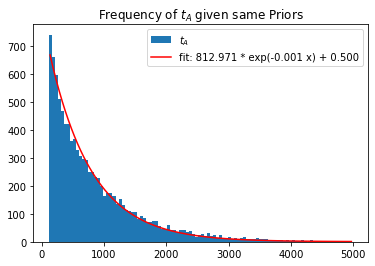

In [334]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, xdata, ydata, p0=(700, 0.001, 0), bounds=(0, [1000., 1., 0.5]))
print(popt)
#popt = (700, 0.001, 0)
# plt.plot(xdata, ydata, 'b-', label='data')
plt.hist(new_time,bins = 100, label = "$t_A$")
plt.title("Frequency of $t_A$ given same Priors")
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: %5.3f * exp(-%5.3f x) + %5.3f' % tuple(popt))
plt.legend()

residuals = ydata - func(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared



## Gaussian fit

[8.05e+02 1.50e-03 8.00e-01]


0.9905970041957403

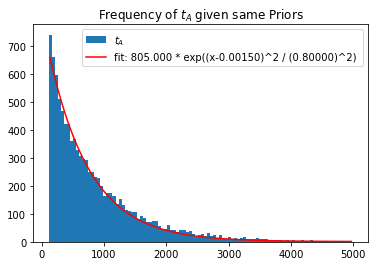

In [349]:
def gaussian(x, mean, amplitude, standard_deviation):
    # return amplitude * np.exp((-mean * x**2)/(2*standard_deviation ** 2))
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
popt, pcov = curve_fit(gaussian, xdata, ydata, p0=(805, 0.0015, 0.8), bounds=(0, [1200., 5., 5]))
print(popt)
#popt = (700, 0.001, 0)
# plt.plot(xdata, ydata, 'b-', label='data')
plt.hist(new_time,bins = 100, label = "$t_A$")
plt.title("Frequency of $t_A$ given same Priors")
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: %5.3f * exp(-(x-%5.5f)^2 / (%5.5f)^2) ' % tuple(popt))
plt.legend()


residuals = ydata - gaussian(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared


## Python Powerlaw Package

In [291]:
data = new_time
results = pl.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'exponential')
R, p

Calculating best minimal value for power law fit
5.3713017513229655
2477.0


(-19.168804701396596, 6.899268587280883e-16)

## Belief Analysis 

In [129]:
num_asymptotic_agents_theta(map(lambda x: x.results, res), 0.6, 0.3)

[0.0, 1.0, 0.0]

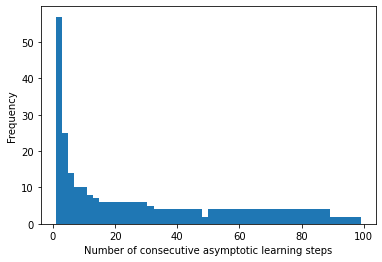

In [196]:
res[0].plot_asymptotic_learning_steps_hist(include_zero=False)


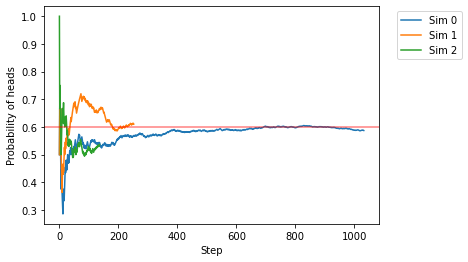

In [225]:
for i in range (3):
    res[i].plot_coins_prob(label = f'Sim {i}')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=0.6, color='r', linestyle='-' , alpha = 0.5)
# plt.xlim(0,500)
# plt.ylim(0,1)
# res[4].plot_coins_prob()

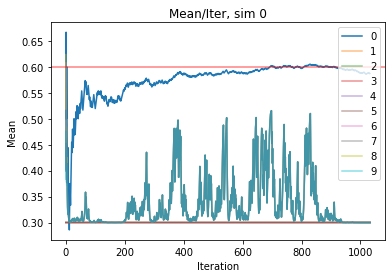

In [219]:
res[0].plot_coins_prob()
res[0].plot_mean()
plt.axhline(y=0.6, color='r', linestyle='-' , alpha = 0.5)

# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# res[0].plot_confidence_in_beliefs_and_sum([0.3,0.6])
# plt.xlim(200,400)

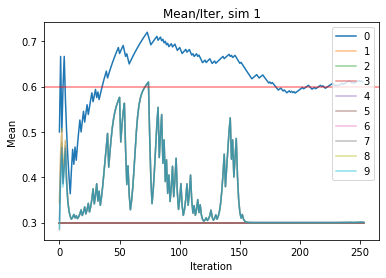

In [222]:
res[1].plot_coins_prob()
res[1].plot_mean()
plt.axhline(y=0.6, color='r', linestyle='-' , alpha = 0.5)

# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# res[0].plot_confidence_in_beliefs_and_sum([0.3,0.6])
# plt.xlim(200,400)

In [294]:
ensemble_t_A = [sim.results.steps if sim.asymptotic else -1 for sim in res]
num_asymptotic = len(ensemble_t_A) - ensemble_t_A.count(-1)
pct_asymptotic = num_asymptotic / len(ensemble_t_A)
" ".join(map(str,ensemble_t_A)), pct_asymptotic, "{:.2f}% ({}/{}) asymptotic".format(pct_asymptotic*100, num_asymptotic, len(ensemble_t_A))

('-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1',
 0.0,
 '0.00% (0/100) asymptotic')

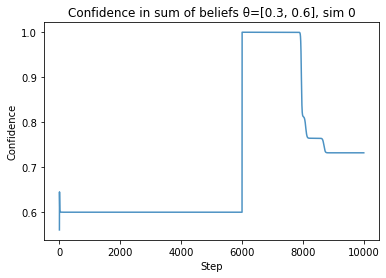

In [28]:
res[0].plot_confidence_in_belief_overall([0.3])

In [11]:
res[0].calc_confidence_in_belief([0.3])[:, -1, :].shape

(1001, 1)

## Change in belief over time

Text(0, 0.5, 'Average number of times $\\ Pr(\\theta = 0.3) = Pr(\\theta = 0.6)$')

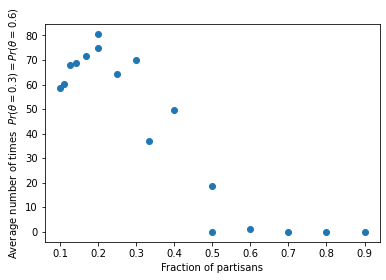

In [274]:
# 1 node fixed, increase total nodes

y = [0,37.06,64.22,74.87,71.44,68.69, 68.12,60.14,58.62,80.47,69.79,49.54,18.8,1,0,0,0]
x = [1/2,1/3,1/4,1/5,1/6,1/7,1/8,1/9, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.scatter(x,y)

plt.xlabel("Fraction of partisans")
plt.ylabel("Average number of times $\\ Pr(\\theta = 0.3) = Pr(\\theta = 0.6)$")

In [289]:
ave = 0
count = 0
for i in range (100):
    if (res[i].asymptotic) == False:
        ave += len(res[i].indices_of_change([0.3, 0.6, 0.9])[0])
        count += 1
ave = ave/count
ave, count


(61.22, 100)

Text(0.5, 1.0, '2 partisans in Network with 10 nodes')

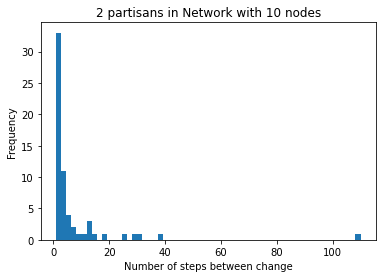

In [287]:
res[0].plot_dist_between_changes([0.3, 0.6, 0.9])
# plt.xlim([0,25])
plt.title("2 partisans in Network with 10 nodes")

Text(0, 0.5, 'Frequency')

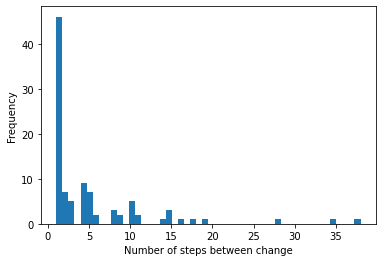

In [56]:
plt.hist(dist_between_changes, bins=50)
plt.xlabel("Number of steps between change")
plt.ylabel("Frequency")

(600.0, 700.0)

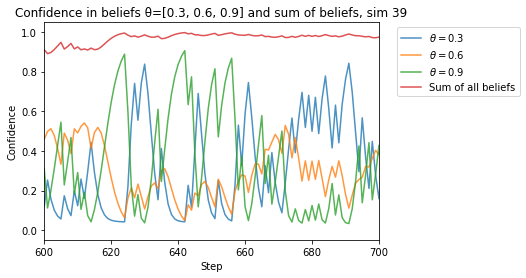

In [293]:
res[39].plot_confidence_in_beliefs_and_sum([0.3,0.6,0.9])
plt.xlim([600,700])


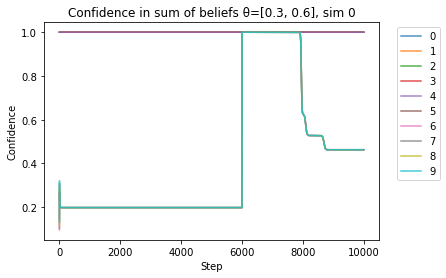

In [40]:
res[0].plot_confidence_in_belief_sum([0.3, 0.6])
# plt.xlim([300,400])


## Draw graph

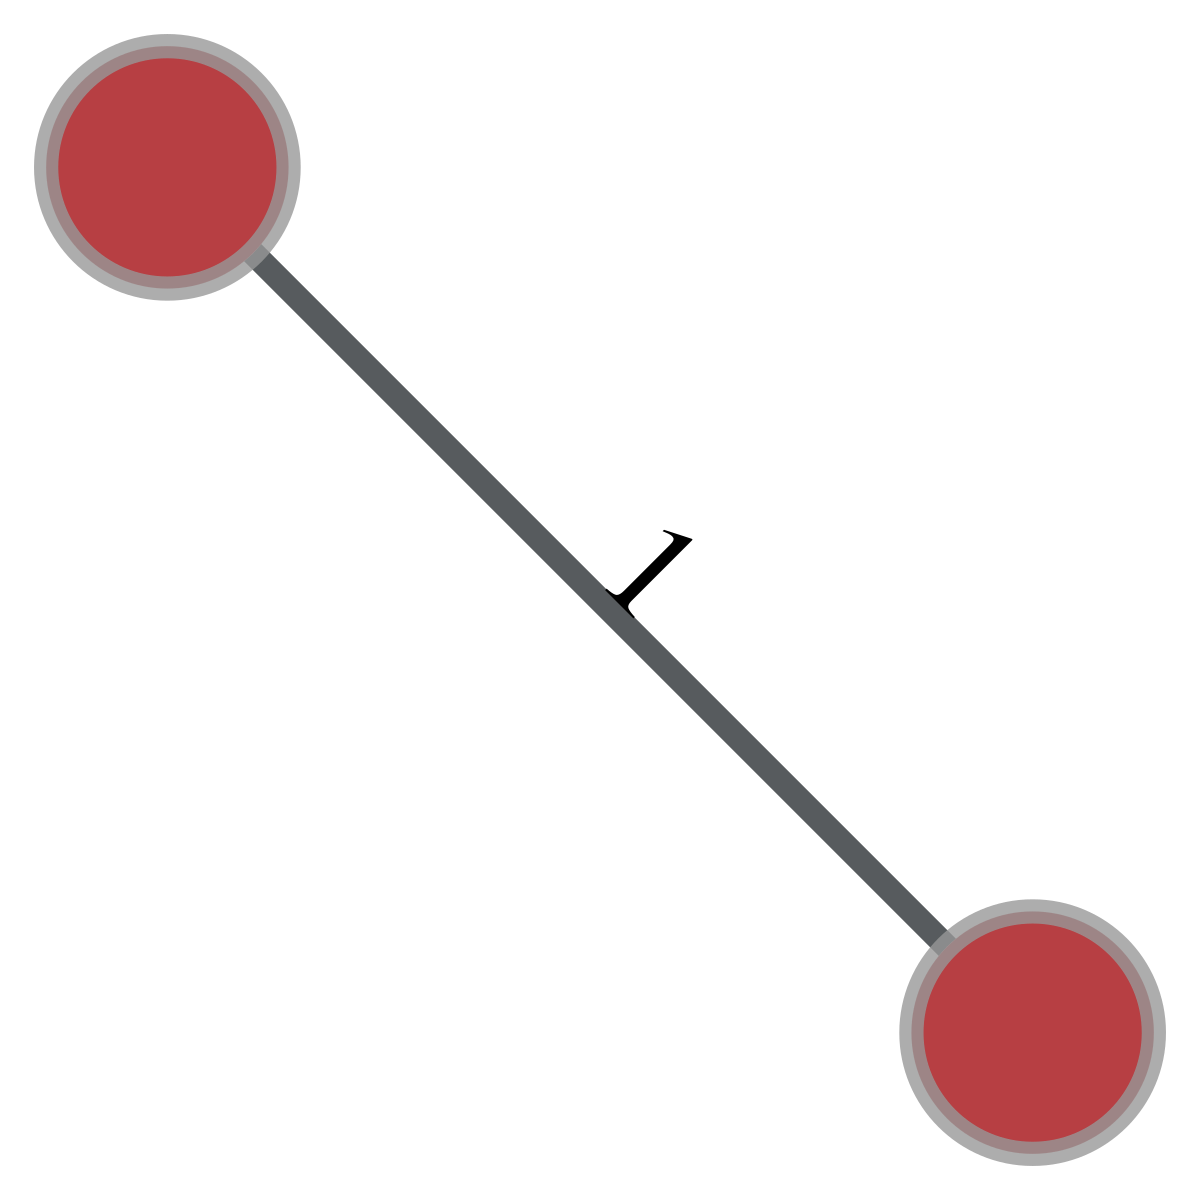

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x28afb6560, at 0x28b6a2710>

In [ ]:
g = res[0].graph()
g.vertex_index.a
g.vertex_index.a
g = res[2].graph()
gt.draw.graph_draw(g, 
                    # vertex_text=g.vertex_index,  # this is broken, idk why 
                    edge_text=g.ep.friendliness)